# Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
data = data.drop('_c39',axis=1)

In [6]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [9]:
data.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


<AxesSubplot:>

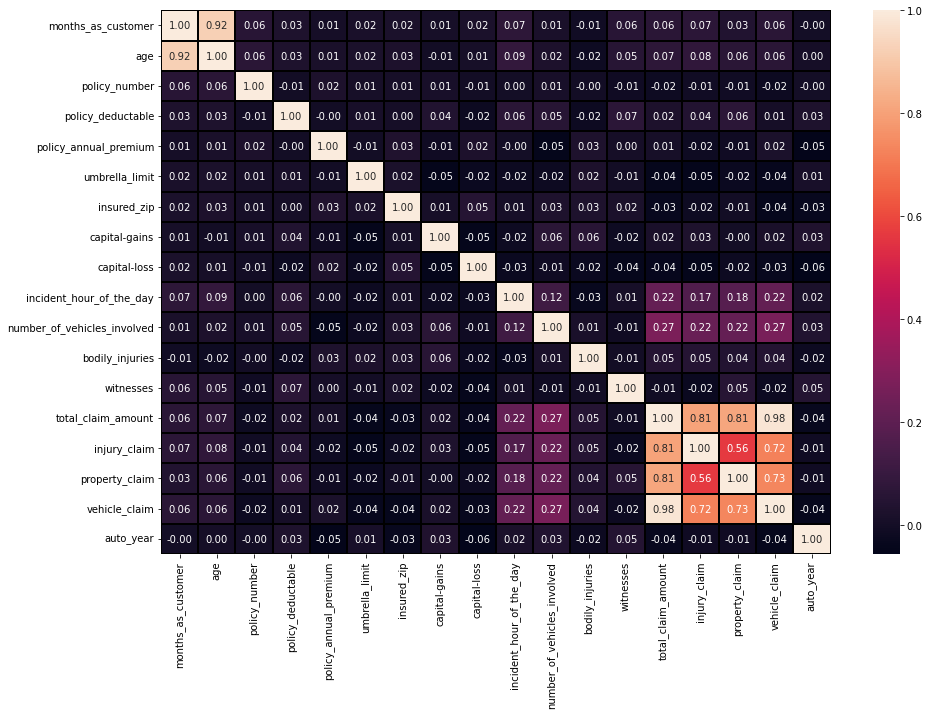

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True,linewidth=0.2,linecolor = 'black',fmt='0.2f')

age and MOnths as customer are highly correlated

total claim,vehicle_claim and injury claim are highly correlated

property_claim and total claim ampunt are highly correrlated


In [14]:
#lets drop these columns
data = data.drop(['injury_claim','property_claim','vehicle_claim','age','policy_number','policy_bind_date',],axis=1)
data.head()


,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,328,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,...,1,YES,1,2,YES,71610,Saab,92x,2004,Y
1,228,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,...,1,?,0,0,?,5070,Mercedes,E400,2007,Y
2,134,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,...,3,NO,2,3,NO,34650,Dodge,RAM,2007,N
3,256,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,...,1,?,1,2,NO,63400,Chevrolet,Tahoe,2014,Y
4,228,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,...,1,NO,0,1,NO,6500,Accura,RSX,2009,N


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

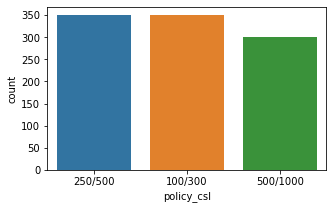

In [19]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='policy_csl',data = data)
data['policy_csl'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

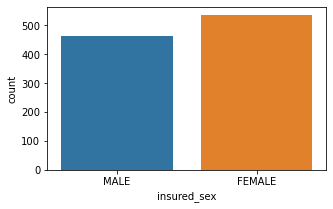

In [20]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x='insured_sex',data = data)
data['insured_sex'].value_counts()

most are Female who insured than man but not in a big margin

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

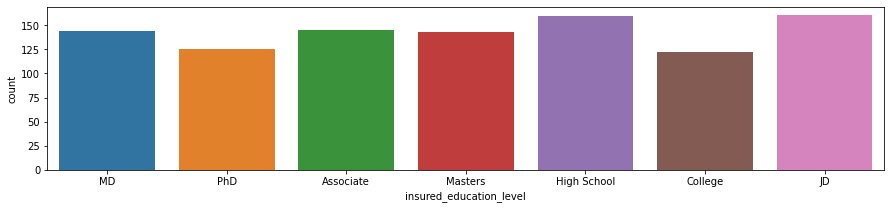

In [22]:
plt.figure(figsize=(15,3))
ax= sns.countplot(x='insured_education_level',data = data)
data['insured_education_level'].value_counts()

Almost every people are educated with highest degreea and some are high schools

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

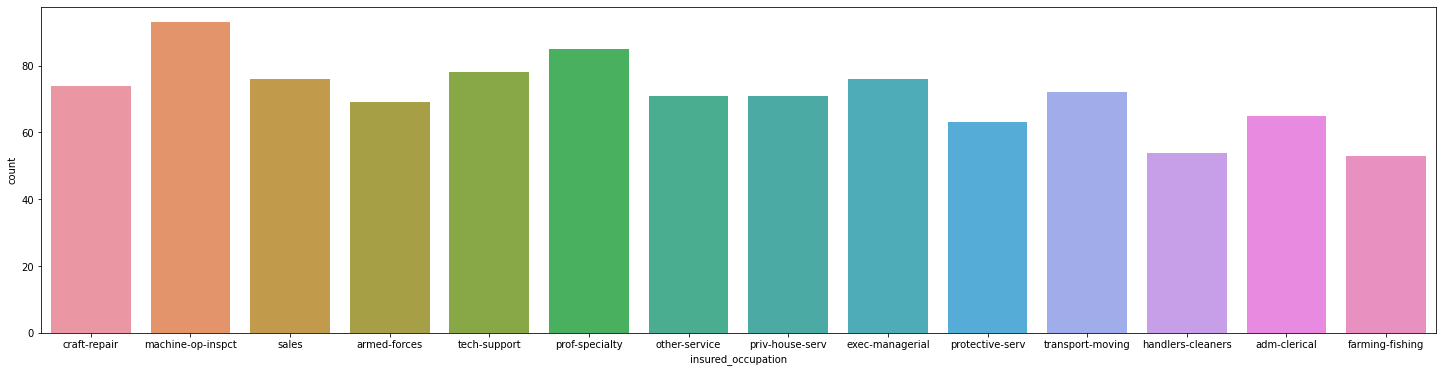

In [24]:
plt.figure(figsize=(25,6))
ax= sns.countplot(x='insured_occupation',data = data)
data['insured_occupation'].value_counts()

All insured are well settled 

In [26]:
data['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

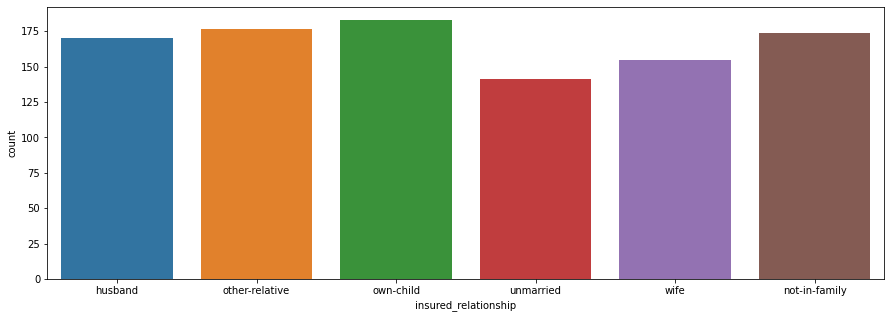

In [29]:
plt.figure(figsize=(15,5))
ax= sns.countplot(x='insured_relationship',data = data)
data['insured_relationship'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

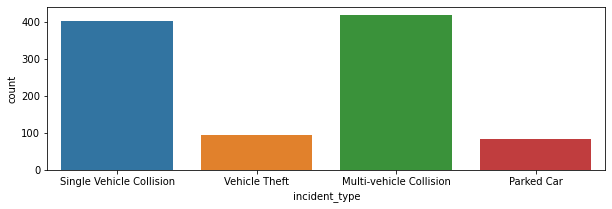

In [31]:
plt.figure(figsize=(10,3))
ax= sns.countplot(x='incident_type',data = data)
data['incident_type'].value_counts()

MAX time accident was occur by single or multi vehicle collision

In [33]:
data['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [34]:
data['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

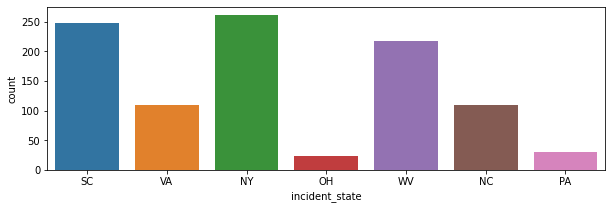

In [35]:
plt.figure(figsize=(10,3))
ax= sns.countplot(x='incident_state',data = data)
data['incident_state'].value_counts()

most no of accident occurs in the NY and SCm

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

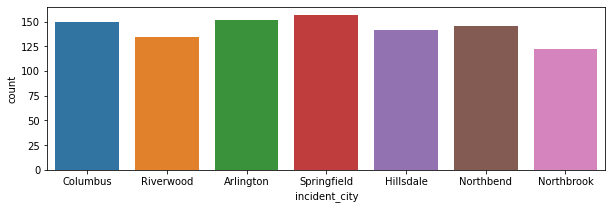

In [39]:
plt.figure(figsize=(10,3))
ax= sns.countplot(x='incident_city',data = data)
data['incident_city'].value_counts()

There is not  much difference between in the incident city clearly graph shows all are included in the incidents

In [40]:
data['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

Max no of vehicle involved in the incident is 1 followwed by 3

In [41]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

there are many incided where no property damage occurs

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

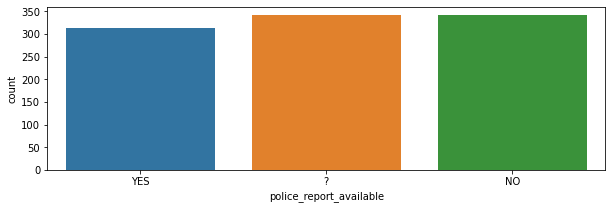

In [42]:
plt.figure(figsize=(10,3))
ax= sns.countplot(x='police_report_available',data = data)
data['police_report_available'].value_counts()

only in approx 33% incident where police report is available

N    753
Y    247
Name: fraud_reported, dtype: int64

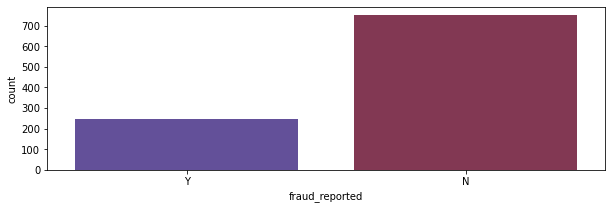

In [45]:
plt.figure(figsize=(10,3))
ax= sns.countplot(x='fraud_reported',data = data,palette='twilight')
data['fraud_reported'].value_counts()

There is approx 25% incident are those where Fraud can be reported

<AxesSubplot:xlabel='insured_education_level', ylabel='policy_annual_premium'>

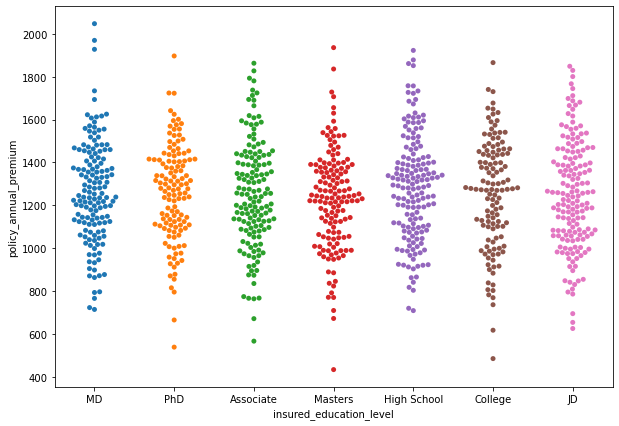

In [52]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='insured_education_level',y='policy_annual_premium',data=data)

Max  policy annual premium given by the most customers who have MD education followed by Masters and high school

<AxesSubplot:xlabel='insured_sex', ylabel='policy_annual_premium'>

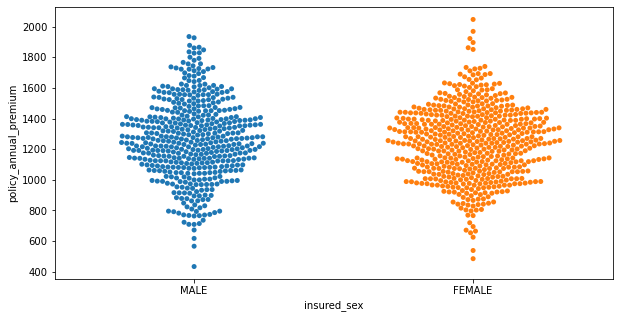

In [57]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='insured_sex',y='policy_annual_premium',data=data)

Max annual policy premium paid  mostly by Females 

In [58]:
data

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,328,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,...,1,YES,1,2,YES,71610,Saab,92x,2004,Y
1,228,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,...,1,?,0,0,?,5070,Mercedes,E400,2007,Y
2,134,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,...,3,NO,2,3,NO,34650,Dodge,RAM,2007,N
3,256,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,...,1,?,1,2,NO,63400,Chevrolet,Tahoe,2014,Y
4,228,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,...,1,NO,0,1,NO,6500,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,...,1,YES,0,1,?,87200,Honda,Accord,2006,N
996,285,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,...,1,YES,2,3,?,108480,Volkswagen,Passat,2015,N
997,130,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,...,3,?,2,3,YES,67500,Suburu,Impreza,1996,N
998,458,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,...,1,?,0,1,YES,46980,Audi,A5,1998,N


<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

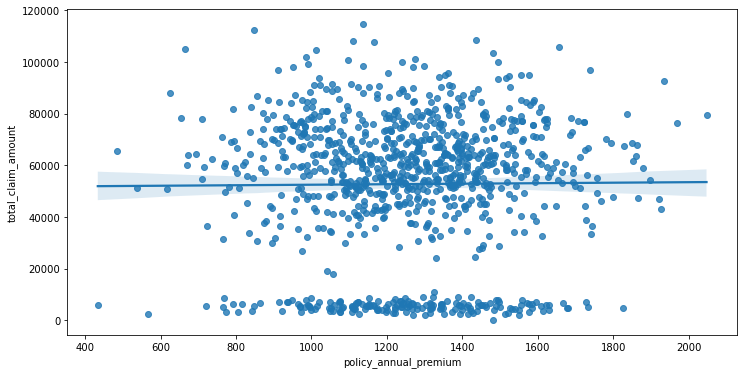

In [62]:
plt.figure(figsize=(12,6))
sns.regplot(x='policy_annual_premium',y='total_claim_amount',data=data)

This graph shows that max no of times total claim amount were taken is approx between 40 to 60k

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_education_level'>

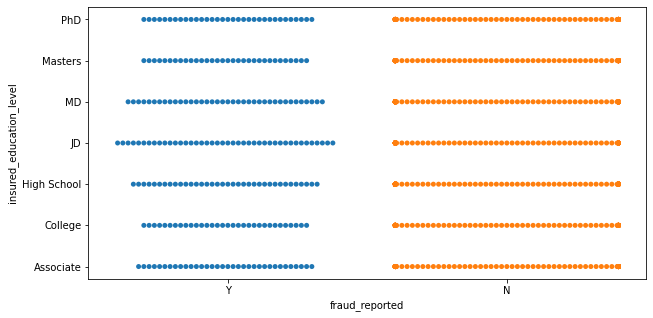

In [65]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='fraud_reported',y='insured_education_level',data=data)

It shows all types of insured educational levels doing frauds in insurance

<Figure size 720x360 with 0 Axes>

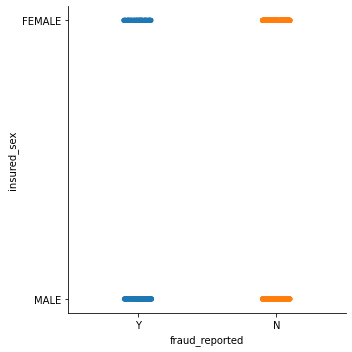

In [67]:
plt.figure(figsize=(10,5))
sns.catplot(x='fraud_reported',y='insured_sex',data=data)

Males and females are equally responsible for the fraud insurances

In [69]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()
var_mode = ['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [74]:
data['incident_date'] = data['incident_date'].str.replace("-","").astype(int)

In [78]:
data

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,328,2,1,1000,1406.91,0,466132,1,4,2,...,1,2,1,2,2,71610,10,1,2004,1
1,228,1,1,2000,1197.22,5000000,468176,1,4,6,...,1,0,0,0,0,5070,8,12,2007,1
2,134,2,0,2000,1413.14,5000000,430632,0,6,11,...,3,1,2,3,1,34650,4,30,2007,0
3,256,0,1,2000,1415.74,6000000,608117,0,6,1,...,1,0,1,2,1,63400,3,34,2014,1
4,228,0,2,1000,1583.91,6000000,610706,1,0,11,...,1,1,0,1,1,6500,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,2,1000,1310.80,0,431289,0,5,2,...,1,2,0,1,0,87200,6,6,2006,0
996,285,0,0,1000,1436.79,0,608177,0,6,9,...,1,2,2,3,0,108480,13,28,2015,0
997,130,2,1,500,1383.49,3000000,442797,0,5,1,...,3,0,2,3,2,67500,11,19,1996,0
998,458,0,2,2000,1356.92,5000000,441714,1,0,5,...,1,0,0,1,2,46980,1,5,1998,0


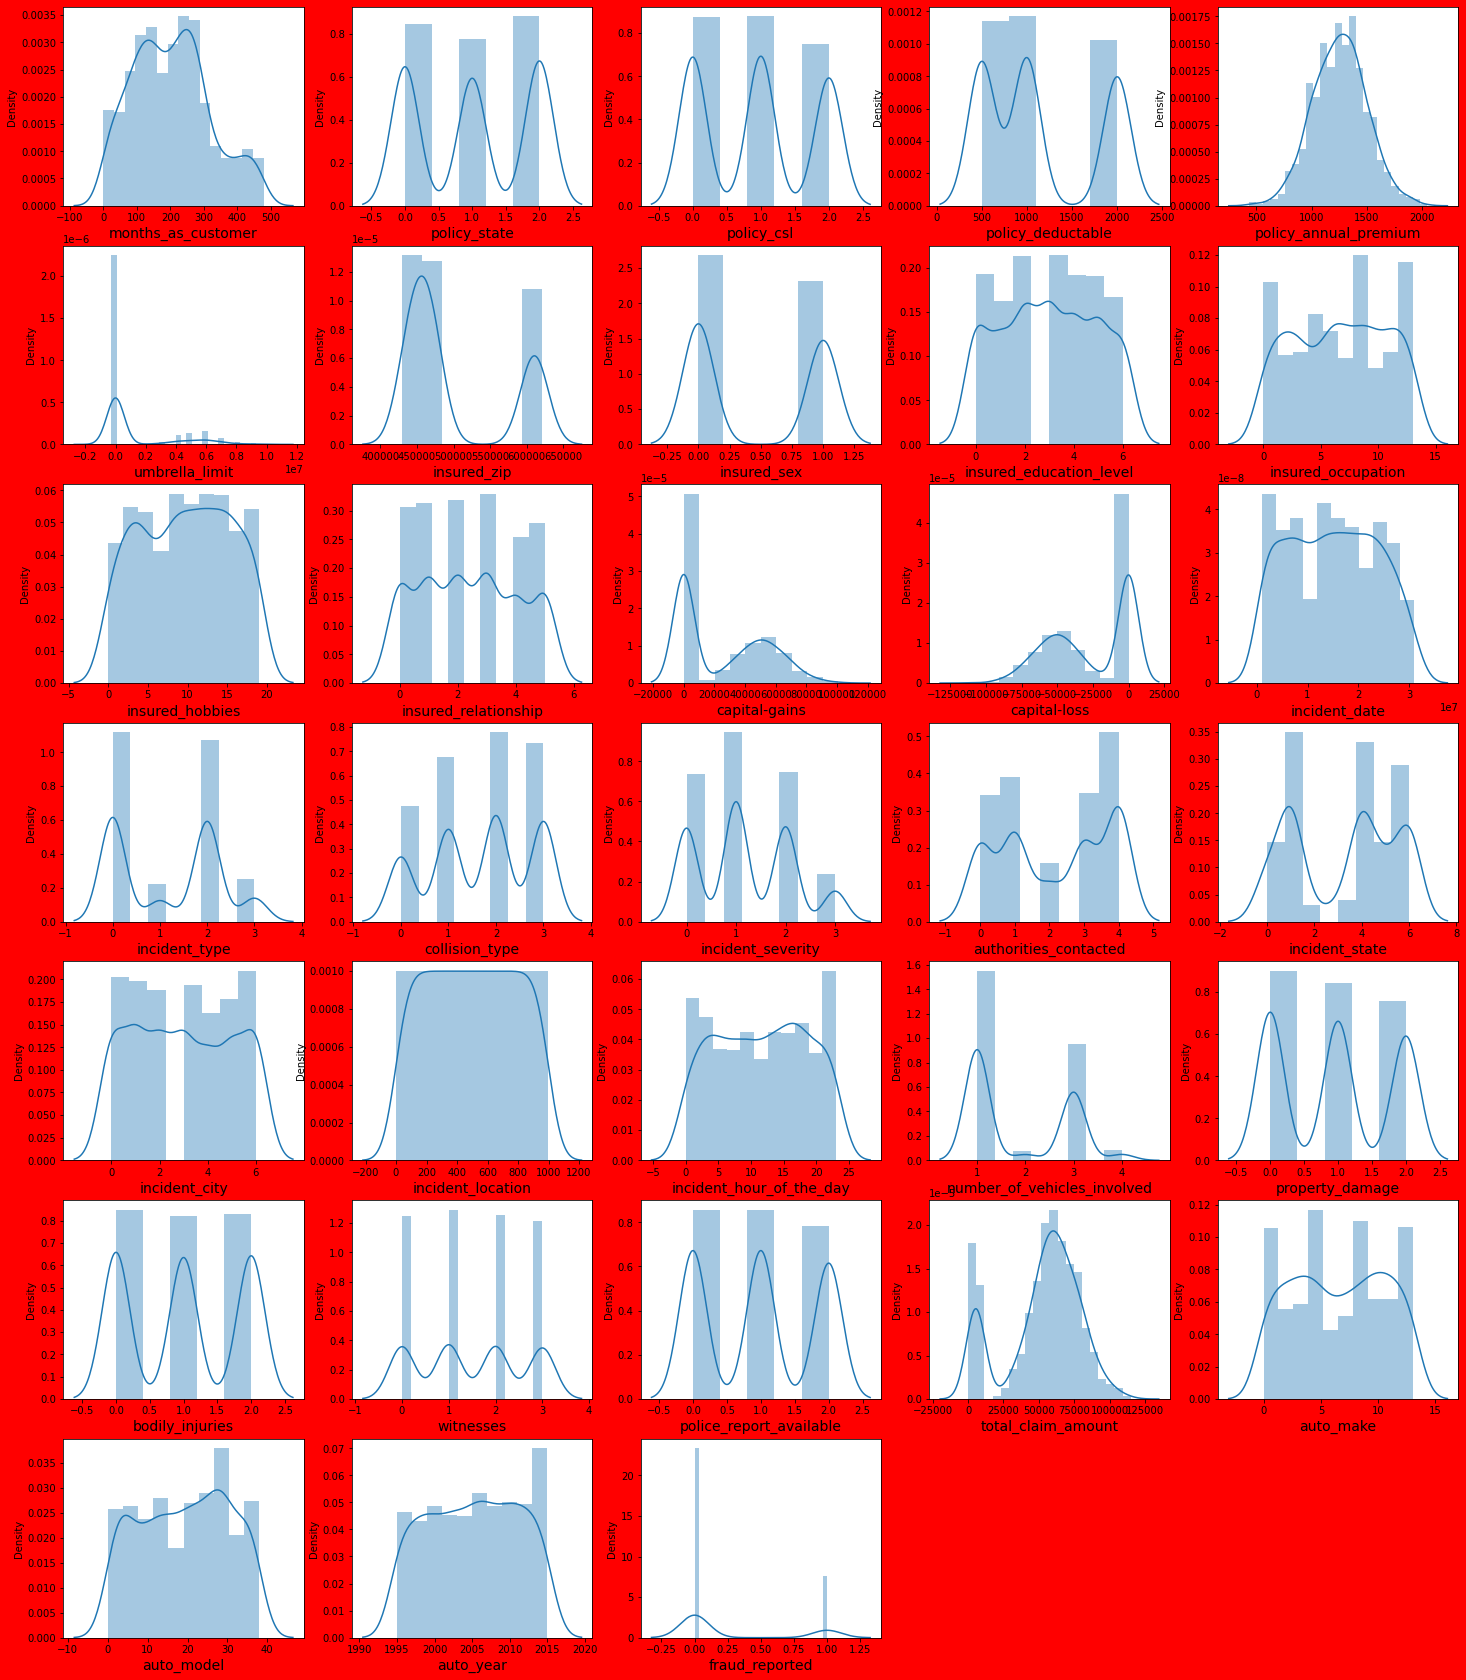

In [80]:
plt.figure(figsize = (25,30),facecolor = "red")
plotnumber = 1
for column in data:
    if plotnumber<=33:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

In [81]:
# lets focus only on continous data columns and check the skewness if any we are going to remove it

In [97]:
features = ['months_as_customer','policy_annual_premium','capital-gains','capital-loss','total_claim_amount','umbrella_limit']

# this is our list which are continous data and show some skewness lets check it if there then remove it

In [96]:
data.skew()

months_as_customer             0.362177
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.039733
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418


In [98]:
print(data['months_as_customer'].skew())
print(data['policy_annual_premium'].skew())
print(data['capital-gains'].skew())
print(data['capital-loss'].skew())
print(data['total_claim_amount'].skew())
print(data['umbrella_limit'].skew())


0.3621768477780205
0.004401994526610823
0.4788502295807907
-0.39147194299389343
-0.594581988510234
1.806712198714504


In [99]:
# as only Umbrella limit has some skewness so  remove it by sqrt transform

In [106]:
data['umbrella_limit'] = np.sqrt(data['umbrella_limit'])

In [107]:
data['umbrella_limit'].skew()

-0.7057626136638129

In [123]:
# now skewness is removed and it comes under in the range from -0.7 to 0.7

as the data have some price and loan amount that very from person to person so we are not checking th eputliers as they ,might not be outliers

In [213]:
data.corr()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,incident_hour_of_the_day,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,-0.000328,-0.026819,0.026807,0.005018,0.017895,0.060925,-0.000833,0.009814,-0.093661,...,0.070639,0.007040,-0.010162,0.058383,0.017647,0.062108,0.047655,0.004202,-0.000292,0.020544
policy_state,-0.000328,1.000000,0.001027,0.010033,0.012455,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,...,0.029457,0.008623,0.013384,0.022960,0.071950,-0.006002,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,0.001027,1.000000,0.003384,0.023978,0.006879,-0.010757,0.009153,0.015788,-0.005960,...,-0.001869,-0.027340,-0.000595,0.071500,0.002424,-0.055758,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.010033,0.003384,1.000000,-0.003245,0.004545,-0.009733,0.015217,-0.046733,0.004061,...,0.060935,0.016900,-0.022765,0.066639,0.030166,0.022839,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.012455,0.023978,-0.003245,1.000000,0.032354,0.038853,-0.019715,0.035922,-0.018019,...,-0.001578,0.095359,0.026780,0.002332,0.013624,0.009094,0.000045,-0.031849,-0.049226,-0.014480
insured_zip,0.017895,0.008777,0.006879,0.004545,0.032354,1.000000,-0.036942,0.016079,-0.069077,0.002106,...,0.008274,0.060342,0.028695,0.019805,-0.017607,-0.033873,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,-0.020481,-0.010757,-0.009733,0.038853,-0.036942,1.000000,0.009002,-0.006160,-0.020317,...,0.019290,0.029293,-0.020297,0.042463,0.020864,-0.023727,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,-0.034327,0.009153,0.015217,-0.019715,0.016079,0.009002,1.000000,-0.020298,0.021807,...,-0.057061,-0.025290,-0.012072,0.019211,0.036141,0.074226,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,-0.031215,0.015788,-0.046733,0.035922,-0.069077,-0.006160,-0.020298,1.000000,-0.011077,...,-0.018435,0.010697,-0.000236,-0.014794,-0.011083,0.003692,0.042621,0.020584,-0.006676,0.001564
insured_hobbies,-0.093661,-0.038689,-0.005960,0.004061,-0.018019,0.002106,-0.020317,0.021807,-0.011077,1.000000,...,0.019979,0.033763,0.031373,-0.033971,-0.045452,-0.004488,0.001525,0.030948,-0.014495,-0.046838


In [149]:
# seprating the columns into features and target
x= data.drop("fraud_reported",axis=1)
y= data["fraud_reported"]

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [146]:
x_scaled.shape[1]

31

In [147]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.042663,months_as_customer
1,1.026656,policy_state
2,1.025315,policy_csl
3,1.027562,policy_deductable
4,1.034074,policy_annual_premium
5,1.029558,insured_zip
6,1.023581,insured_sex
7,1.036879,insured_education_level
8,1.017340,insured_occupation
9,1.044269,insured_hobbies


Hence incident type and no of vehicles involved are correlated so we should drop this column to avoid multicollinearity adn we are readt to build our model

In [148]:
data = data.drop('number_of_vehicles_involved',axis=1)

so we are ready to build our model data is good now 

In [151]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

In [152]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25)

In [153]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_lr)*100)
print('-------------------')
print('===================')
print('-------------------')
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy 78.0
-------------------
-------------------
[[195   0]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       195
           1       0.00      0.00      0.00        55

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.61      0.78      0.68       250



In [154]:
Test_accuracy = accuracy_score(y_test,pred_lr)

In [155]:
from sklearn.model_selection import cross_val_score

In [156]:
scr_lr = cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of logistic regression model is :- ",scr_lr.mean())

Cross Validation Score of logistic regression model is :-  0.752


In [157]:
# now we trying with Decision tree classifier 

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('-------------------------')
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 78.8
-------------------------
[[162  33]
 [ 20  35]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       195
           1       0.51      0.64      0.57        55

    accuracy                           0.79       250
   macro avg       0.70      0.73      0.71       250
weighted avg       0.81      0.79      0.80       250



In [160]:
scr_dt = cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision TREE model is :-",scr_dt.mean())

Cross Validation Score of Decision TREE model is :- 0.8009999999999999


In [161]:
# now check with random forest classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_rf)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy 79.2
[[176  19]
 [ 33  22]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       195
           1       0.54      0.40      0.46        55

    accuracy                           0.79       250
   macro avg       0.69      0.65      0.66       250
weighted avg       0.77      0.79      0.78       250



In [164]:
scr_rf = cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RANDOM FOREST model is :-",scr_rf.mean())

Cross Validation Score of RANDOM FOREST model is :- 0.7849999999999999


In [165]:
# now with SVC algo

In [166]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)

pred_sv=sv.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_sv)*100)

print('=========================================')
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

Accuracy 78.0
[[195   0]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       195
           1       0.00      0.00      0.00        55

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.61      0.78      0.68       250



In [167]:
scr = cross_val_score(sv,x,y,cv=5)
print("Cross Validation Score of SVC model is :-",scr.mean())

Cross Validation Score of SVC model is :- 0.7529999999999999


In [168]:
# now with Knn

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_kn)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_kn))
print(classification_report(y_test,pred_kn))

Accuracy 69.6
[[162  33]
 [ 43  12]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       195
           1       0.27      0.22      0.24        55

    accuracy                           0.70       250
   macro avg       0.53      0.52      0.53       250
weighted avg       0.68      0.70      0.68       250



In [171]:
knn = cross_val_score(kn,x,y,cv=5)
print("Cross Validation Score of Knn model is :-",knn.mean())

Cross Validation Score of Knn model is :- 0.7150000000000001


In [172]:
from sklearn.ensemble import GradientBoostingClassifier

In [173]:
gbd = GradientBoostingClassifier()
gbd.fit(x_train,y_train)
pred_gbd=gbd.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gbd)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_gbd))
print(classification_report(y_test,pred_gbd))

Accuracy 83.2
[[165  30]
 [ 12  43]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       195
           1       0.59      0.78      0.67        55

    accuracy                           0.83       250
   macro avg       0.76      0.81      0.78       250
weighted avg       0.86      0.83      0.84       250



In [174]:
gbdt = cross_val_score(gbd,x,y,cv=5)
print("Cross Validation Score of GBDT model is :-",gbdt.mean())

Cross Validation Score of GBDT model is :- 0.825


# so the difference between the cross val score and the accuracy score is  min for the GBDT algo SO WE USED THIS algo
and the testing accuracy is grt than others


# BUT BEFORE USED HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [175]:
from sklearn.model_selection import GridSearchCV

In [180]:
grid_params = {'max_depth':range(4,8),'min_samples_split':range(2,8,2),'learning_rate':np.arange(0.1,0.3)}

clf = GridSearchCV(GradientBoostingClassifier(),param_grid=grid_params)
clf.fit(x_train,y_train)




GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [181]:
print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2}


In [200]:
gbd = GradientBoostingClassifier(max_depth = 4, min_samples_split = 4, learning_rate = 0.3)

In [201]:
gbd.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=4, min_samples_split=4)

In [202]:
y_preds = gbd.predict(x_test)

In [203]:
cfm = confusion_matrix(y_test,y_preds)
cfm

array([[165,  30],
       [ 12,  43]], dtype=int64)

In [204]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       195
           1       0.59      0.78      0.67        55

    accuracy                           0.83       250
   macro avg       0.76      0.81      0.78       250
weighted avg       0.86      0.83      0.84       250



In [199]:
print("ACCURACY",accuracy_score(y_test,y_preds))

ACCURACY 0.836


In [206]:
# ROC CURVE 

fpr,tpr,thresholds = roc_curve(y_test,y_preds)

In [207]:
print('THRESHOLDS=',thresholds)
print('True positive rate=',tpr)
print('FAlse positive rate=',fpr)


THRESHOLDS= [2 1 0]
True positive rate= [0.         0.78181818 1.        ]
FAlse positive rate= [0.         0.15384615 1.        ]


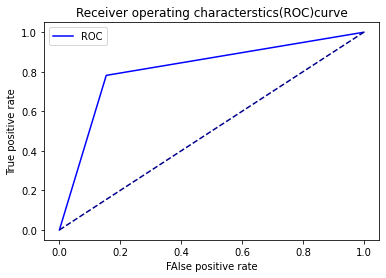

In [208]:
plt.plot(fpr,tpr,color = 'blue',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--')
plt.xlabel('FAlse positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characterstics(ROC)curve')
plt.legend()
plt.show()

In [209]:
# lets chk area it is covering(AUC)
auc_score = roc_auc_score(y_test,y_preds)
print(auc_score)

0.813986013986014


In [210]:
# so after tuning, its accuracy is increased by very few extent  so we used our GBDT model to predict

In [211]:
# saving the model for later prediction
import pickle

In [212]:
filename = 'INSURANCE FRAUD .pickle'
pickle.dump(gbd,open(filename,'wb'))

# HENCE MY MODEL IS READY TO PREDICT